# 03: Tensors

- A specific type of array is requried in the context of PyTorch based neural nets, called "tensors"
- Tensors are similar to NumPy arrays but additional specific functionalities needed for deep learning
- Brief exploration of PyTorch tensors, accessible from the torch module:


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Creating arrays

In [2]:
# create array filled with ones
t_array = torch.ones((3,2))
t_array

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [3]:
n_array = np.ones((3,2))
n_array

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [4]:
# find the array type with *dtype*

print(f't_array dtype: {t_array.dtype}')
print(f'n_array type: {n_array.dtype}')

t_array dtype: torch.float32
n_array type: float64


In [5]:
# pytorch implements other funcs to create arrays similar to Numpy
# eg. random number arrays:

t_random = torch.randint(0, 255, (10,10))
t_random

tensor([[ 48, 224, 171,  44, 219, 240,  26,  15,  91, 111],
        [150,  14, 115, 221,  63,  88,  82, 157,  71, 160],
        [ 43, 249,  83, 197,   2,  67,   9, 209, 209, 178],
        [ 39, 112, 228, 126,  53, 198, 211,  37, 186,  94],
        [249,  44, 105, 102, 151, 235, 219, 165, 126, 210],
        [103,  57, 213,   9, 133, 243, 115, 123,  55,  48],
        [ 34, 207, 129, 125,  65,  18,   1,  62, 228, 106],
        [178,  15, 176, 192,  86,  26, 222,   0, 249, 120],
        [ 19, 120, 185, 126, 136, 183, 201,  32,   8, 188],
        [115, 177, 241, 188, 139,  91, 139,  90,  21,  43]])

In [6]:
# from numpy to tensor
t_from_n = torch.tensor(n_array)
t_from_n

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)

In [7]:
# numpy from tensor

t_from_n.numpy()

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

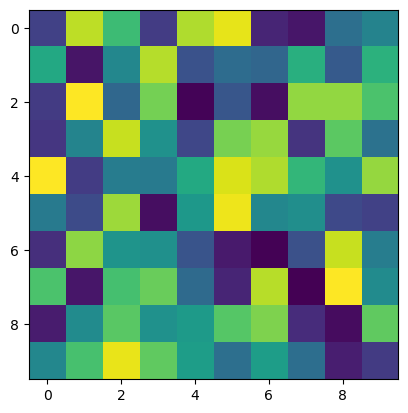

In [8]:
plt.imshow(t_random);

### Indexing, broadcasting, etc

In [9]:
t_random

tensor([[ 48, 224, 171,  44, 219, 240,  26,  15,  91, 111],
        [150,  14, 115, 221,  63,  88,  82, 157,  71, 160],
        [ 43, 249,  83, 197,   2,  67,   9, 209, 209, 178],
        [ 39, 112, 228, 126,  53, 198, 211,  37, 186,  94],
        [249,  44, 105, 102, 151, 235, 219, 165, 126, 210],
        [103,  57, 213,   9, 133, 243, 115, 123,  55,  48],
        [ 34, 207, 129, 125,  65,  18,   1,  62, 228, 106],
        [178,  15, 176, 192,  86,  26, 222,   0, 249, 120],
        [ 19, 120, 185, 126, 136, 183, 201,  32,   8, 188],
        [115, 177, 241, 188, 139,  91, 139,  90,  21,  43]])

In [10]:
t_random[0,:] # row 0

tensor([ 48, 224, 171,  44, 219, 240,  26,  15,  91, 111])

In [11]:
# broadcasting allows the combining of tensors of different but compatible shapes:
torch.ones((3,5)) * torch.randint(0, 255, (1,5))

tensor([[ 42., 143., 183.,  36., 241.],
        [ 42., 143., 183.,  36., 241.],
        [ 42., 143., 183.,  36., 241.]])

- may need to flatten arrays
- eg. to create a fully connected layer in a deep learning network
- done in two ways:

In [12]:
t_random.flatten()

tensor([ 48, 224, 171,  44, 219, 240,  26,  15,  91, 111, 150,  14, 115, 221,
         63,  88,  82, 157,  71, 160,  43, 249,  83, 197,   2,  67,   9, 209,
        209, 178,  39, 112, 228, 126,  53, 198, 211,  37, 186,  94, 249,  44,
        105, 102, 151, 235, 219, 165, 126, 210, 103,  57, 213,   9, 133, 243,
        115, 123,  55,  48,  34, 207, 129, 125,  65,  18,   1,  62, 228, 106,
        178,  15, 176, 192,  86,  26, 222,   0, 249, 120,  19, 120, 185, 126,
        136, 183, 201,  32,   8, 188, 115, 177, 241, 188, 139,  91, 139,  90,
         21,  43])

Specify which contiguous dimensions you want to flatten:

In [13]:

t_3d = torch.randint(0, 100, (2,3,4))
t_3d

tensor([[[74, 84, 52, 77],
         [70, 55, 23, 46],
         [ 2, 75, 18, 84]],

        [[19, 53, 73, 61],
         [63, 80, 30, 21],
         [20, 97, 75, 43]]])

In [14]:
torch.flatten(t_3d, start_dim=1, end_dim=2)

tensor([[74, 84, 52, 77, 70, 55, 23, 46,  2, 75, 18, 84],
        [19, 53, 73, 61, 63, 80, 30, 21, 20, 97, 75, 43]])

Alternative: 

- use the *view* method, which if possible, returns only a *view* of the array
- can pass compatible dimensions to reshape the tensor, or simply use *-1* to completely flatten it

In [15]:
t_random = torch.randint(0,255,(10,10))

In [16]:
t_random.view(5, 20)

tensor([[ 67,  16, 196, 253, 128,  45, 165,  25,  31,   7,   7,  91, 135, 215,
         219, 138,  93,  72,  59,  40],
        [ 71, 247, 224,   4,  17, 172, 173,  81, 234, 129,  22,  55, 161, 167,
          64, 217, 117, 207, 126, 224],
        [ 73, 150, 176,  86, 217,  12, 212,  23, 211,  54, 209, 120, 237, 152,
          41, 192,  12,  40, 227, 169],
        [ 47, 181,  67,  44, 142, 150,  41,  47, 143, 229, 240, 102, 222, 224,
          77,  83, 123, 243,  43, 188],
        [215, 155, 131, 152,  65,  11, 214, 154, 181,  14, 112,  58, 141, 214,
         238, 168, 204, 248,  41,  72]])

In [17]:
# flatten
t_random.view(-1)

tensor([ 67,  16, 196, 253, 128,  45, 165,  25,  31,   7,   7,  91, 135, 215,
        219, 138,  93,  72,  59,  40,  71, 247, 224,   4,  17, 172, 173,  81,
        234, 129,  22,  55, 161, 167,  64, 217, 117, 207, 126, 224,  73, 150,
        176,  86, 217,  12, 212,  23, 211,  54, 209, 120, 237, 152,  41, 192,
         12,  40, 227, 169,  47, 181,  67,  44, 142, 150,  41,  47, 143, 229,
        240, 102, 222, 224,  77,  83, 123, 243,  43, 188, 215, 155, 131, 152,
         65,  11, 214, 154, 181,  14, 112,  58, 141, 214, 238, 168, 204, 248,
         41,  72])

As we are dealing with a *view*: If we modify one of the arrays *in place*, the values in the other arrays are changed as well. This means that this is **not** an independent array, but a shallow-copy. BE CAREFUL

In [18]:
view_copy = t_random.view(5,20)
view_copy

tensor([[ 67,  16, 196, 253, 128,  45, 165,  25,  31,   7,   7,  91, 135, 215,
         219, 138,  93,  72,  59,  40],
        [ 71, 247, 224,   4,  17, 172, 173,  81, 234, 129,  22,  55, 161, 167,
          64, 217, 117, 207, 126, 224],
        [ 73, 150, 176,  86, 217,  12, 212,  23, 211,  54, 209, 120, 237, 152,
          41, 192,  12,  40, 227, 169],
        [ 47, 181,  67,  44, 142, 150,  41,  47, 143, 229, 240, 102, 222, 224,
          77,  83, 123, 243,  43, 188],
        [215, 155, 131, 152,  65,  11, 214, 154, 181,  14, 112,  58, 141, 214,
         238, 168, 204, 248,  41,  72]])

In [19]:
view_copy.fill_(1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [20]:
# original affected
t_random

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

### Gradients

- to perform backpropogation in Deep Learning networks, we need to calculate all the necessary gradients.
- this feature is integrated into PyTorch arrays directly:
    - use the **require_grad** option
    - simple example, define a variable **x = 1**


In [21]:
x = torch.ones(1, 1, requires_grad=True)

In [22]:
x

tensor([[1.]], requires_grad=True)

Pass variable through a few simple operations:

In [23]:
y = 2 * x

In [24]:
z = y**(3/2)

In [25]:
w = 5 * z

Our last variable that depended initially on x, is now w. So w needs to be optimised in respect to variable x. We can do this simply by calculating the gradients of w **dw/dx**

In [26]:
w.backward()

In [27]:
print(x.grad)

tensor([[21.2132]])


Verify that we indeed obtain the correct gradient:

In [28]:
5 * (3/2)*(2**0.5)*2

21.213203435596427

recover a numpy array from a PyTorch tensor or plot a PyTorch tensor with Matplotlib

In [29]:
x.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
x.detach().numpy()

array([[1.]], dtype=float32)

### Sending tensors to a GPU

If pc has a compatible GPU, or if you run the notebook on Google Colab with a GPU runtime -> you can exploit Graphics card computing power

The data will have to be "pushed" or "pulled" to and from that device. Can push entire networks but for the moment just send a tensor

Check GPU is a available

In [ ]:
torch.cuda.is_available()

False